# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'C:\\Users\\meagv\\Google Drive\\Springboard Data Science\\Guided Capstone'

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [2]:
df = pd.read_csv('step3_output.csv')
df.head()
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.000000,36.0,69.0,30.0,34.00000,152.0,30.0,2
1,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.000000,49.0,250.0,74.0,78.00000,104.0,80.0,1
2,Yosemite Ski & Snowboard Area,California,7800,600,0,0.0,0,0,0,1,...,88.0,0.0,110.000000,84.0,300.0,47.0,47.00000,107.0,0.0,1
3,Boreal Mountain Resort,California,7700,500,0,0.0,0,1,1,3,...,380.0,200.0,150.000000,54.0,400.0,49.0,64.16681,150.0,200.0,1
4,Dodge Ridge,California,8200,1600,0,0.0,0,0,1,2,...,862.0,0.0,115.103943,69.0,350.0,78.0,78.00000,140.0,0.0,1


## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [3]:
dfo=df.select_dtypes(include=['object']) 
df = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [4]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df

X=df.drop(columns=['AdultWeekend'])

In [5]:
df.head()


,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2090,294,0,0.0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,11100,1800,0,0.0,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7800,600,0,0.0,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,7700,500,0,0.0,0,1,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,8200,1600,0,0.0,0,0,1,2,5,4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
from sklearn import preprocessing
import statsmodels.formula.api as smf
y= df['AdultWeekend'] 
results=smf.ols('y ~ X', data=df).fit()
results.params

Intercept    1.718937e+01
X[0]        -5.651138e-04
X[1]         3.318282e-03
X[2]        -1.474892e-11
X[3]        -4.079632e-12
                 ...     
X[229]       8.726751e+00
X[230]      -7.858631e-01
X[231]       7.248358e+00
X[232]       1.897360e-01
X[233]      -5.302643e+00
Length: 235, dtype: float64

## Split into training and testing datasets

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 

scaler = preprocessing.StandardScaler().fit(X)

print(scaler.fit(X))

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

StandardScaler(copy=True, with_mean=True, with_std=True)


**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [8]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train,X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

In [9]:
X.head()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
0,2090,294,0,0.0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,11100,1800,0,0.0,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,7800,600,0,0.0,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,7700,500,0,0.0,0,1,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,8200,1600,0,0.0,0,0,1,2,5,4,...,0,0,0,0,0,0,0,0,0,0


# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [10]:

from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [11]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred=model.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [12]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

In [13]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [14]:
explained_variance_score(y_test, y_pred)

0.5704312573295661

In [15]:
mean_absolute_error(y_test, y_pred)

7.279160022878756

In [16]:

np.sqrt(np.mean((y_pred-y_test)**2))

9.122245012387642

In [17]:
print(lm.intercept_)


56.472581202451664


In [18]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}).head(20)

,y_test,y_pred
0,47.00000,57.260500
1,62.00000,51.299057
2,65.00000,54.973693
3,48.00000,47.845493
4,64.16681,55.264889
5,45.00000,48.260537
6,59.00000,53.191792
7,89.00000,67.901837
8,49.00000,41.517896
9,54.00000,49.006395


**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

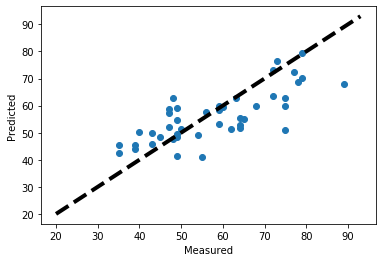

In [19]:
#Lets also graph it to look at it
#more info here
# https://scikit-learn.org/0.18/auto_examples/plot_cv_predict.html
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [20]:
#xgBoost and include a randomizedsearchCV for hyperparameter tuning
#Please watch this video after running the code 
#https://www.youtube.com/watch?v=Gol_qOgRqfA
#import xgboost as xgb
#from sklearn.model_selection import RandomizedSearchCV

In [21]:
#xgb = xgb.XGBRegressor()
#model1 = xgb.fit(X_train,y_train)
#model1

In [22]:
#show XGB model prediction
#y_pred2 = model1.predict(X_test)
#The explained variance score 
#print(explained_variance_score(y_test, y_pred2))

#The MSE
#print(mean_absolute_error(y_test, y_pred2))

#Root mean squared error 
#print(np.sqrt(np.mean((y_pred2-y_test)**2)))

In [23]:
#Lets do some hypertuning 
#Set up grid for hyperparameter tuning 
#First lets set the parameters, rule of thumb is to play around with 2-3 at a time depending on your GPU
#Here is the sklearn doc on linear regression tuning
#https://scikit-learn.org/stable/modules/linear_model.html
#XgBoost https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html

#Dictionary to contain the params
#params = {}

#params['xgbregressor__gamma'] = np.arange(1,20,1)
#params['xgbregressor__max_depth'] = np.arange(1,100,1)
#params['xgbregressor__min_child_weight'] = np.arange(1, 10, 1)

In [24]:
#

In [25]:
#Looking at the best model results 
#results = pd.DataFrame(grid.cv_results_)
#results.sort_values('rank_test_score').head()

In [26]:
#The best score using our search of xgboost
#grid.best_score_

In [27]:
#grid.best_params_

In [28]:
#how well is our prediciton after tuning
#grid_pred = grid.predict(X_test)

In [29]:
#Predictions vs Actual 
#pd.DataFrame({'y_test' : y_test, 'grid_pred' : grid_pred}).head(20)

In [30]:
#Lets also graph it to look at it
#fig, ax = plt.subplots()
#ax.scatter(y_test, grid_pred)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.show()

In [31]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
AdultWeekday,3.241095
Name_Enchanted Forest Ski Area,1.638723
Name_Timberline Four Seasons,1.532335
Snow Making_ac,1.504021
clusters,1.408014
...,...
Name_Donner Ski Ranch,0.017369
state_Missouri,0.017040
Name_Timber Ridge,0.012775
Name_Ski Sawmill,0.009218


Model 2

In [32]:


filtered= [col for col in X.columns if not col.startswith('state_')]
filtered2= [col for col in filtered if not col.startswith('Name_')]
filtered3= [col for col in filtered2 if not col.startswith('summit')]
X_new = X[filtered2].copy()
X_new
scaler = preprocessing.StandardScaler().fit(X_new)
print(scaler.fit(X_new))

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_new_scaled=scaler.transform(X_new)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 



StandardScaler(copy=True, with_mean=True, with_std=True)


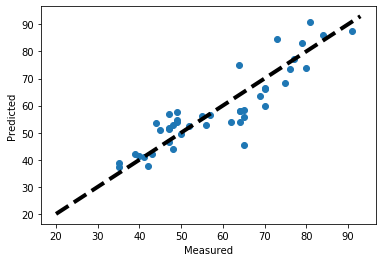

In [33]:
X1_train,X1_test, y_train, y_test = train_test_split(X_new_scaled, y, test_size=0.25)
lm = linear_model.LinearRegression()
model2 = lm.fit(X1_train,y_train)
y = y.ravel()
y_pred2=model2.predict(X1_test)
pd.DataFrame({'y_test': y_test, 'y_pred2': y_pred2}).head(20)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred2)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()




In [34]:
explained_variance_score(y_test, y_pred2)


0.7947731584589223

In [35]:
mean_absolute_error(y_test, y_pred2)


5.2404909552191645

In [36]:
np.sqrt(np.mean((y_pred2-y_test)**2))

6.553187706046615

In [37]:
# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 





In [38]:

pd.DataFrame(abs(lm.coef_), X_new.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
AdultWeekday,1.002275e+01
summit_elev,3.192908e+00
clusters,2.924692e+00
vertical_drop,2.153056e+00
daysOpenLastYear,1.602257e+00
surface,1.536503e+00
projectedDaysOpen,1.530775e+00
TerrainParks,1.484744e+00
triple,1.466304e+00
quad,1.357674e+00


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [39]:
X3 = X[filtered3].copy()
X3
scaler = preprocessing.StandardScaler().fit(X3)
print(scaler.fit(X3))

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X3_scaled=scaler.transform(X3)

StandardScaler(copy=True, with_mean=True, with_std=True)


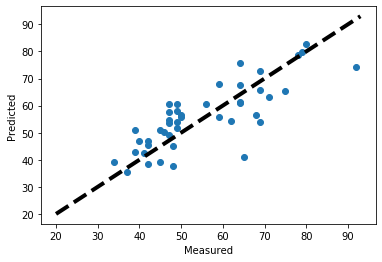

In [40]:
X3_train,X3_test, y_train, y_test = train_test_split(X3_scaled, y, test_size=0.25)
lm = linear_model.LinearRegression()
model3 = lm.fit(X3_train,y_train)
y = y.ravel()
y_pred3=model3.predict(X3_test)
pd.DataFrame({'y_test': y_test, 'y_pred2': y_pred2}).head(20)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred3)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [41]:
explained_variance_score(y_test, y_pred3)


0.636846695897072

In [42]:
mean_absolute_error(y_test, y_pred3)


6.713459384251797

In [43]:
np.sqrt(np.mean((y_pred3-y_test)**2))

8.229789210059213

In [44]:
pd.DataFrame(abs(lm.coef_), X3.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

,Coefficient
AdultWeekday,1.024948e+01
vertical_drop,2.508355e+00
clusters,2.396359e+00
SkiableTerrain_ac,2.286814e+00
TerrainParks,1.611903e+00
averageSnowfall,1.587475e+00
quad,1.382569e+00
daysOpenLastYear,1.200665e+00
Snow Making_ac,9.936862e-01
surface,9.581533e-01


## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0. |  |-|
| Model 2. | 0.| |'state'|
| Model 3. | 0. | |'state','summit_elev','base_elev'|

Model Selection:

 Model 3